### Understanding Best Fit Line : FTSE100 & HSBC

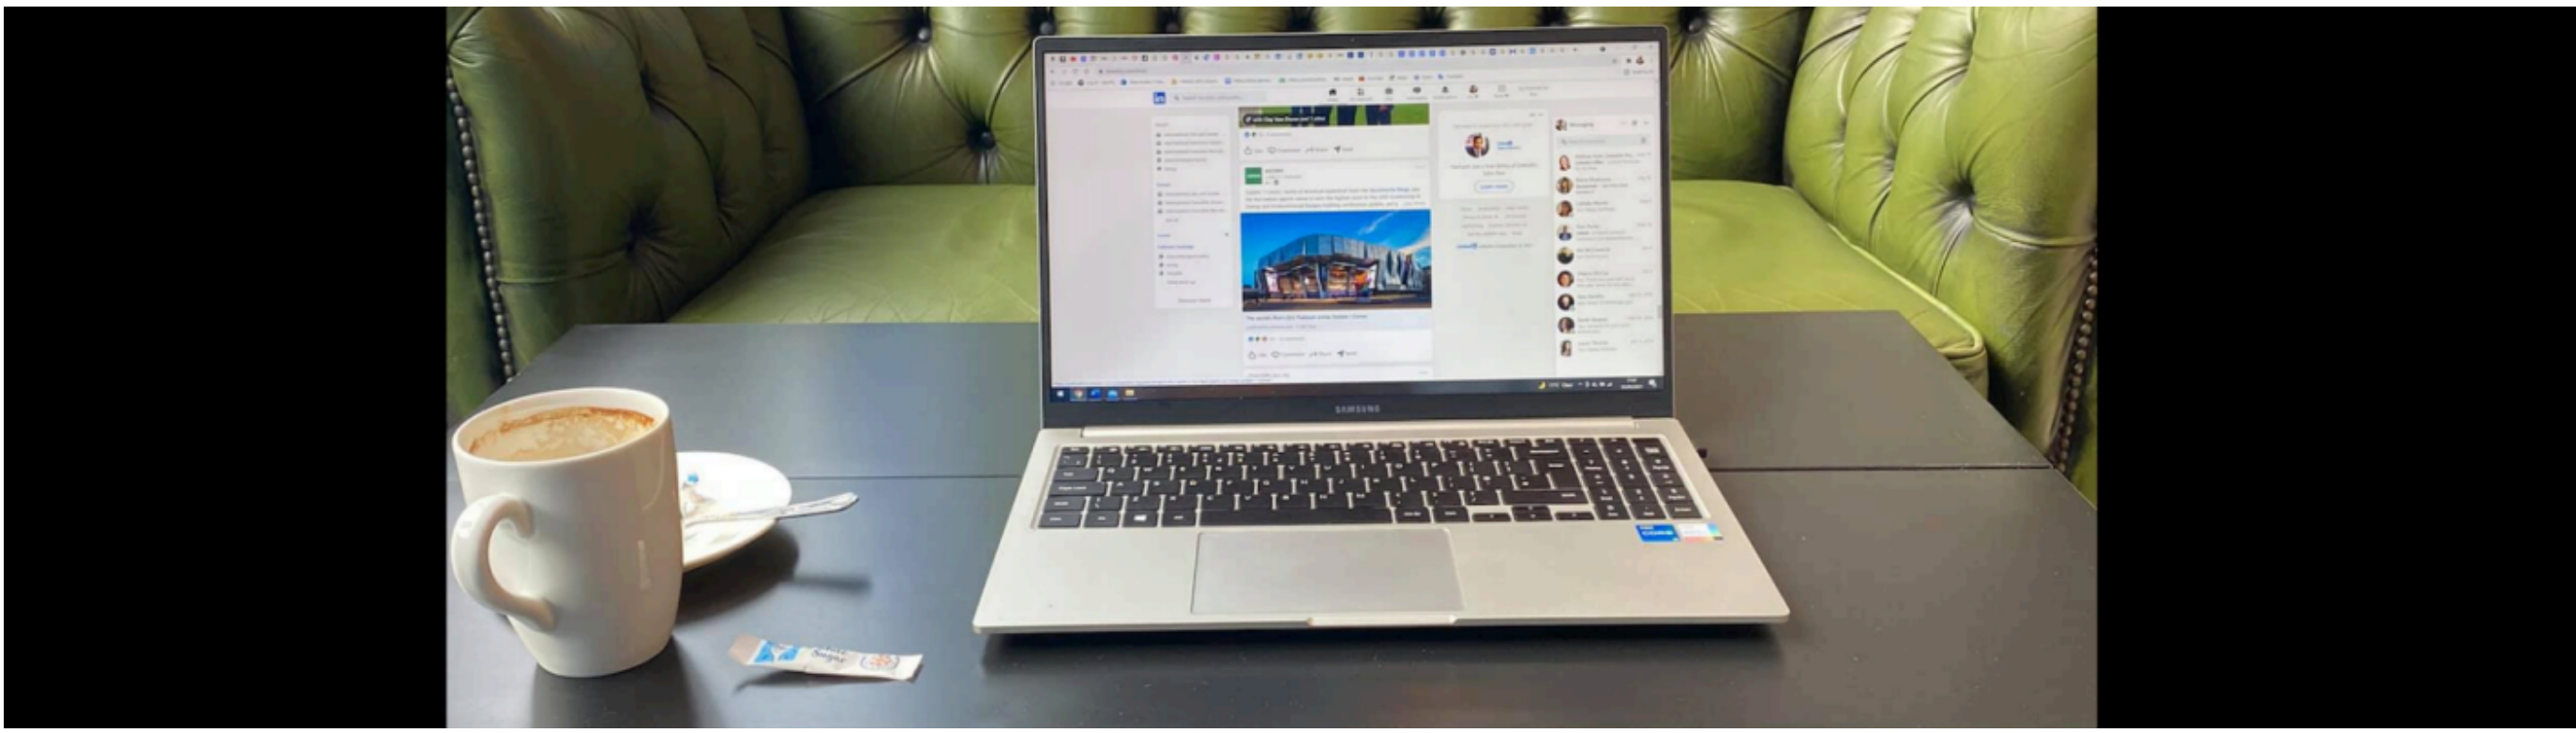

##### HEMANT THAPA

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Data Mining 

In [3]:
def stock(ticker, time):
    return yf.download(ticker, period=time)

#### Fearture Selection 

In [4]:
ftse = stock("^FTSE", "3y")
hsbc = stock("HSBA.L", "3y")
#converting into pound
hsbc['Close'] = hsbc['Close'] / 100

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
X = ftse['Close'].values.reshape(-1, 1)
y = hsbc['Close']

In [6]:
def shape(X, y):
    if len(X) == len(y):
        print("Shape of X is equal to y")
        print(f"X shape: {X.shape}")
        print(f"y shape: {y.shape}")
        return X, y
    elif len(X) > len(y):
        X_new = X[:len(y)]
        print(f"X shape after truncation: {X_new.shape}")
        print(f"y shape: {y.shape}")
        return X_new, y
    elif len(y) > len(X):
        y_new = y[:len(X)]
        print(f"X shape: {X.shape}")
        print(f"y shape after truncation: {y_new.shape}")
        return X, y_new

In [7]:
X,y = shape(X,y)

Shape of X is equal to y
X shape: (756, 1)
y shape: (756,)


#### Scaling for both Features and Target 

In [8]:
X = (X - X.mean())/ X.std()
y = (y - y.mean())/ y.std()

#### Splitting Data into Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

#### Training Model 

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Predictions

In [11]:
y_pred = regressor.predict(X_test)
test_cost = np.sum((y_test - y_pred) ** 2) / (2 * len(y_test))
print(f"The cost function on the test set: {test_cost:.4f}")

The cost function on the test set: 0.1727


In [12]:
y_pred = regressor.predict(X_test)

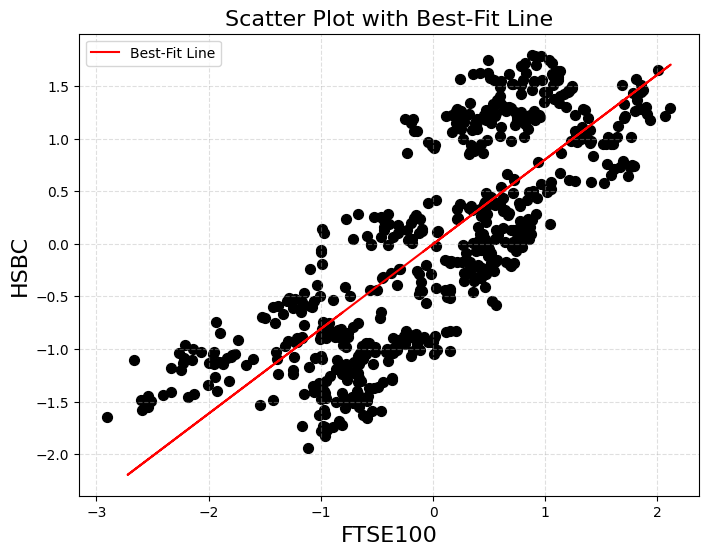

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train,y_train,s=50, color="black")
plt.plot(X_test, y_pred, color="red", label="Best-Fit Line")
plt.xlabel('FTSE100', fontsize=16)
plt.ylabel('HSBC', fontsize=16)
plt.title('Scatter Plot with Best-Fit Line', fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

#### R Square, Mean Square Error, Root Mean Square Error and Mean Absolute Error

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_square)

Mean Absolute Error: 0.5080426286205975
Mean Squared Error: 0.3454024421019081
Root Mean Squared Error: 0.5877094878440436
R-squared: 0.6122694906401822


#### GRADIENT DESCENT 

##### Feature Seledtion and Feature Scaling 

In [15]:
X = ftse['Close']
y = hsbc['Close']

In [16]:
X, y = shape(X,y)

Shape of X is equal to y
X shape: (756,)
y shape: (756,)


In [17]:
X = (X - X.mean())/ X.std()
y = (y - y.mean())/ y.std()

In [18]:
class GradientDescent:
    def __init__(self, x, y, m_curr=0, c_curr=0, iteration=50, rate=0.1):
        self.x = x
        self.y = y
        self.m_curr = m_curr
        self.c_curr = c_curr
        self.iteration = iteration
        self.rate = rate
        self.param_updates = []  
        self.derivative_updates = [] 

    def cost_function(self):
        N = len(self.y)
        predicted_y = (self.m_curr * self.x) + self.c_curr
        return np.sum((self.y - predicted_y) ** 2) / (2 * N) 

    def calculation(self):
        gradient_descent = pd.DataFrame(columns=['m_curr', 'c_curr', 'cost'])
        N = float(len(self.y))

        for i in range(self.iteration):
            predicted_y = (self.m_curr * self.x) + self.c_curr
            cost = self.cost_function()
            m_gradient = -(1/N) * np.sum(self.x * (self.y - predicted_y))
            c_gradient = -(1/N) * np.sum(self.y - predicted_y)

            #check for NaN or infinity values in gradients
            if np.isnan(m_gradient) or np.isinf(m_gradient) or np.isnan(c_gradient) or np.isinf(c_gradient):
                print("Warning: NaN or infinity encountered in gradients. Adjust learning rate or initial values.")
                break

            self.param_updates.append((self.m_curr, self.c_curr))
            self.derivative_updates.append((m_gradient, c_gradient))

            self.m_curr -= self.rate * m_gradient
            self.c_curr -= self.rate * c_gradient

            gradient_descent.loc[i] = [self.m_curr, self.c_curr, cost]
        return gradient_descent

In [19]:
gd = GradientDescent(X, y)
gradient_descent = gd.calculation()

#### Cost Function

In [20]:
gradient_descent

,m_curr,c_curr,cost
0,0.079100,-3.759485e-17,0.499339
1,0.150300,-8.270868e-17,0.439895
2,0.214390,-1.278225e-16,0.391731
3,0.272079,-1.691768e-16,0.352707
4,0.324007,-2.180502e-16,0.321089
5,0.370749,-2.631640e-16,0.295470
6,0.412823,-3.120373e-16,0.274713
7,0.450695,-3.609106e-16,0.257895
8,0.484785,-3.985054e-16,0.244268
9,0.515471,-4.436193e-16,0.233227


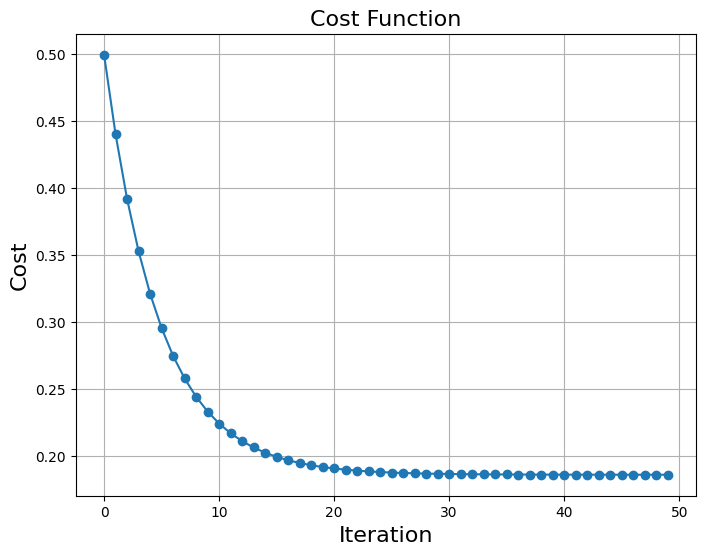

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(gradient_descent.index, gradient_descent['cost'], marker='o')

plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.title('Cost Function', fontsize=16)
plt.grid(True)
plt.show()

In [22]:
predicted_y = gradient_descent.iloc[-1]['m_curr'] * X + gradient_descent.iloc[-1]['c_curr']
cost = np.sum((y - predicted_y) ** 2) / (2 * len(y))

print(f"The cost function for the best-fit line is: {cost:.4f}")

The cost function for the best-fit line is: 0.1861


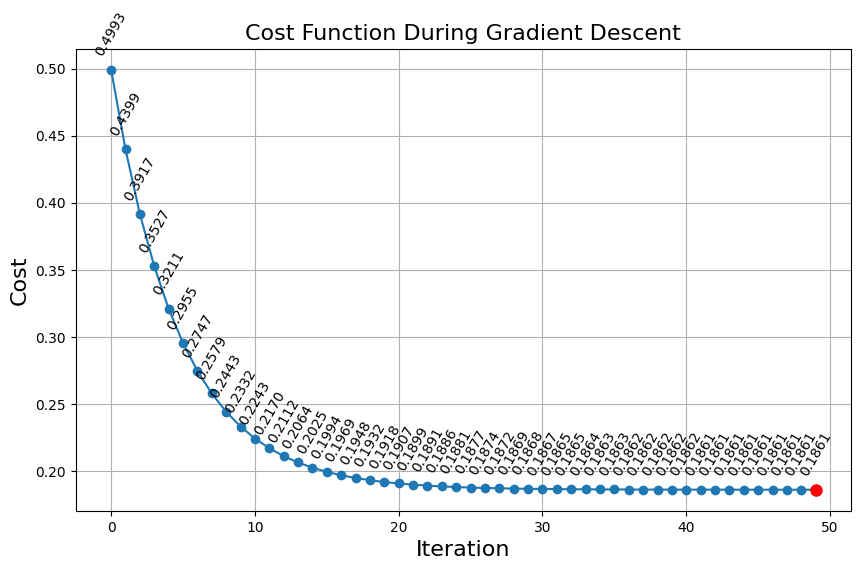

In [23]:
best_iteration = gradient_descent['cost'].idxmin()
best_cost = gradient_descent.loc[best_iteration, 'cost']

plt.figure(figsize=(10, 6))
plt.plot(gradient_descent.index, gradient_descent['cost'], marker='o')
plt.plot(best_iteration, best_cost, marker='o', markersize=8, color='red')
for i, row in gradient_descent.iterrows():
    plt.annotate(f'{row["cost"]:.4f}', (i, row["cost"]), textcoords="offset points", xytext=(0,10), ha='center', rotation=60)

plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)
plt.title('Cost Function During Gradient Descent', fontsize=16)
plt.grid(True)
plt.show()

#### Best Fit Line

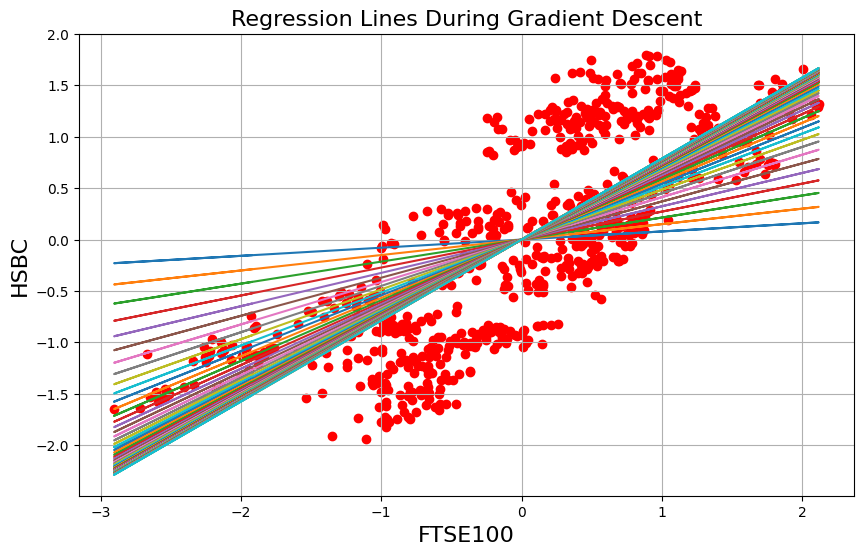

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='red', label='Data Points')
for i in range(gradient_descent.shape[0]):
    y_pred = gradient_descent.iloc[i]['m_curr'] * X + gradient_descent.iloc[i]['c_curr']
    plt.plot(X, y_pred, label=f'Iteration {i + 1}')

plt.xlabel('FTSE100', fontsize=16)
plt.ylabel('HSBC', fontsize=16)
plt.title('Regression Lines During Gradient Descent', fontsize=16)
plt.grid(True)
plt.show()


In [25]:
gradient_descent.iloc[-1]

m_curr    7.879345e-01
c_curr   -1.086491e-15
cost      1.860950e-01
Name: 49, dtype: float64

In [26]:
best_fit_line = gradient_descent.iloc[-1]['m_curr'] * X + gradient_descent.iloc[-1]['c_curr']
best_fit_line[:20]

Date
2021-01-18   -1.516343
2021-01-19   -1.535298
2021-01-20   -1.467850
2021-01-21   -1.529390
2021-01-22   -1.579360
2021-01-25   -1.717703
2021-01-26   -1.680532
2021-01-27   -1.893708
2021-01-28   -1.995125
2021-01-29   -2.287318
2021-02-01   -2.142330
2021-02-02   -2.018510
2021-02-03   -2.040420
2021-02-04   -2.050511
2021-02-05   -2.085959
2021-02-08   -2.001772
2021-02-09   -1.981833
2021-02-10   -1.999557
2021-02-11   -1.988971
2021-02-12   -1.838568
Name: Close, dtype: float64

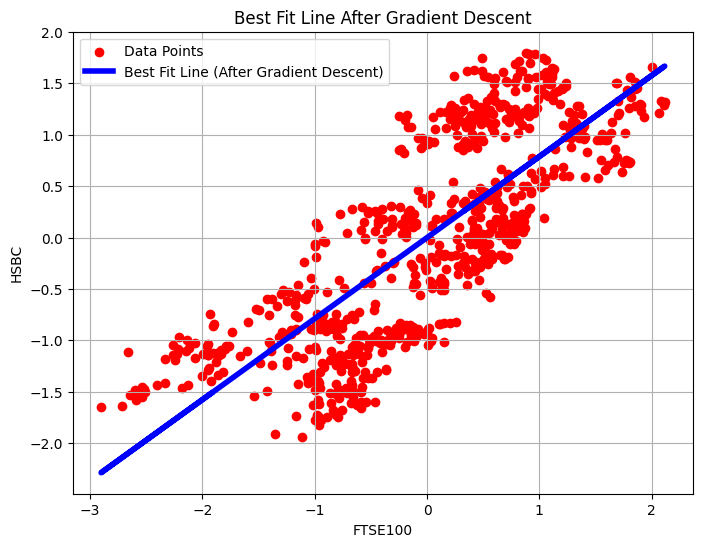

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, best_fit_line, label='Best Fit Line (After Gradient Descent)', color='blue', linewidth=4)
plt.xlabel('FTSE100')
plt.ylabel('HSBC')
plt.title('Best Fit Line After Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
mae = mean_absolute_error(y, best_fit_line)
mse = mean_squared_error(y, best_fit_line)
rmse = np.sqrt(mse)
r_square = r2_score(y, best_fit_line)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_square)

Mean Absolute Error: 0.5214235491791103
Mean Squared Error: 0.3721860679948909
Root Mean Squared Error: 0.6100705434577963
R-squared: 0.6273209703256457


In [29]:
residuals = y - best_fit_line

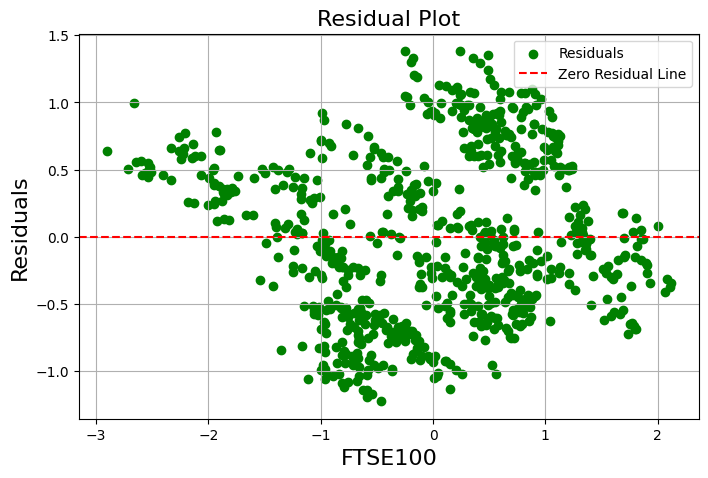

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(X, residuals[:899], color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('FTSE100', fontsize=16)
plt.ylabel('Residuals', fontsize=16)
plt.title('Residual Plot', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [31]:
import scipy.stats as stats

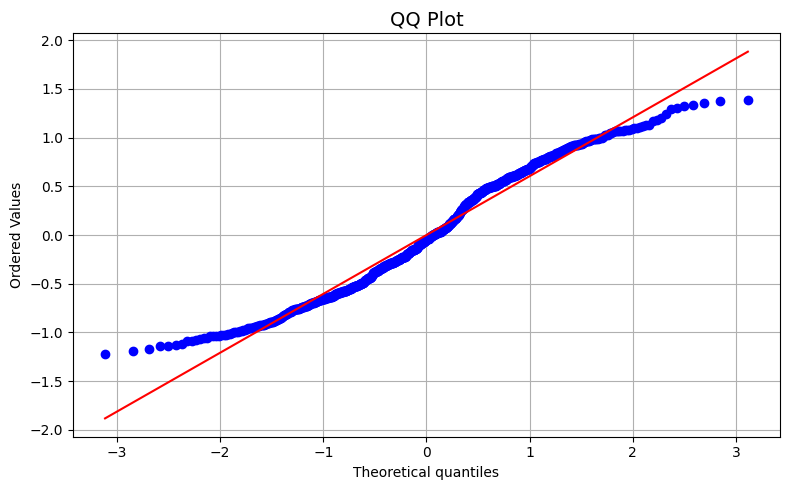

In [32]:
plt.figure(figsize=(8, 5))
stats.probplot(residuals[:899], dist="norm", plot=plt)
plt.title('QQ Plot', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### REFERENCES:
    
"Gradient Descent and Linear Regression" - Atomic Object (June 24, 2014)
URL: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

"Variants of Gradient Descent Algorithm" - Analytics Vidhya (March, 2021)
URL: https://www.analyticsvidhya.com/blog/2021/03/variants-of-gradient-descent-algorithm/

